## Language Analysis of Alexithymic Discourse

<hr>

Alexithymic Language Project / raul@psicobotica.com / V2 release (sept 2020)

<hr>

### Dataset preprocessing

- Dataset load / cleansing. 
- Apply participant inclusion/exclusion criteria. 
- Descriptive analysis.
- Dichotomous / class variable calculation (pos/neg alexithymia). 
- Text Processing: Tokenization. 
- Text Processing: Stop words. 
- Text Processing: Stemming. 
- Text Processing: POS Tagging. 
- Text Processing: NER Tagging. 
- Text Processing: Lexical Parsing.
- Text Processing: Dependency Parsing.


### Dataset load

In [119]:
import pandas as pd 
import numpy as np
from scipy import stats

from sklearn.metrics import cohen_kappa_score

%matplotlib inline
import matplotlib.pyplot as plt 

In [120]:
prolexitim_dataset_path = "https://raw.githubusercontent.com/raul-arrabales/alexithymic-lang/master/data/Prolexitim_v2_tagged.csv"

alex_df = pd.read_csv(prolexitim_dataset_path, header=0, delimiter=";")

In [121]:
# Keep only adults
alex_df = alex_df.drop(alex_df[alex_df.Age < 18].index) 
alex_df = alex_df.drop(alex_df[alex_df.Age > 65].index) 

In [122]:
alex_df.head()

,Code,TAS20,F1,F2,F3,Gender,Age,Card,T_Metaphors,T_ToM,T_FP,T_Interpret,T_Desc,T_Confussion,Text
0,bc39e22ca5dba59fbd97c27987878f56,40,16,9,15,2,22,1,0,1,0,1,0,0,es un niño pensando en cual es la respuesta de...
1,bc39e22ca5dba59fbd97c27987878f56,40,16,9,15,2,22,9VH,0,0,0,1,0,0,soldados descansando.
2,bc39e22ca5dba59fbd97c27987878f56,40,16,9,15,2,22,11,0,0,0,0,1,0,Una cascada.
3,bc39e22ca5dba59fbd97c27987878f56,40,16,9,15,2,22,13HM,0,1,0,0,0,0,hombre llorando porque su mujer ha muerto.
4,20cd825cadb95a71763bad06e142c148,40,12,10,18,2,22,1,0,1,0,0,0,0,un Niño cansado de estudiar y presionado por s...


In [123]:
alex_df.count()

Code            396
TAS20           396
F1              396
F2              396
F3              396
Gender          396
Age             396
Card            396
T_Metaphors     396
T_ToM           396
T_FP            396
T_Interpret     396
T_Desc          396
T_Confussion    396
Text            396
dtype: int64

In [124]:
alex_df.isnull().values.any()

False

In [125]:
df_na = alex_df[alex_df.isna().any(axis=1)]
df_null = alex_df[alex_df.isnull().any(axis=1)]
df_na

,Code,TAS20,F1,F2,F3,Gender,Age,Card,T_Metaphors,T_ToM,T_FP,T_Interpret,T_Desc,T_Confussion,Text


### Gender and Age stats

In [126]:
alex_df.Age.describe()

count    396.000000
mean      34.664141
std       12.310367
min       18.000000
25%       24.000000
50%       35.500000
75%       43.000000
max       61.000000
Name: Age, dtype: float64

In [127]:
# alex_df.Age.plot.hist(by=None, bins=20)

In [128]:
alex_df.Gender.value_counts()

2    254
1    142
Name: Gender, dtype: int64

### Build categorical TAS-20 variables

**Cutoff scoring - Criterion A** (column Alex-A):

Bagby, R. M., Parker, J. D. A. & Taylor, G. J. (1994). The twenty-item Toronto Alexithymia Scale-I. Item selection and cross-validation of the factor structure. Journal of Psychosomatic Research, 38, 23-32.

- Equal to or less than 51 = non-alexithymia.
- Scores of 52 to 60 = possible alexithymia.
- Equal to or greater than 61 = alexithymia.

Expressed into a dichotomous variable: 
- Positive (TAS-20 >= 61)
- Negative (TAS-20 < 61)


**Cutoff scoring - Criterion B** (column Alex-B):

Loas, G., Otmani, O., Fremaux, D., Lecercle, C., Duflot, M., & Delahousse, J. (1996). External validity, reliability and basic score determination of the Toronto Alexithymia Scales (TAS and TAS-20) in a group of alcoholic patients. L'Encephale, 22(1), 35-40.

- Score less that 44 for non-alexithymia has been also considered.
- Scores of 45 to 55 = possible alexithymia.
- Equal to or greater than 56 = alexithymia.

Expressed into a dichotomous variable: 
- Positive (TAS-20 >= 56)
- Negative (TAS-20 < 56)

In [129]:
alex_df['Alex_A'] = np.where(alex_df['TAS20']>=61, 1, 0)
alex_df['Alex_B'] = np.where(alex_df['TAS20']>=56, 1, 0)

In [130]:
# How much the two criteria differ? 

# Point biserial correlation
stats.pointbiserialr( alex_df.Alex_A, alex_df.Alex_B )

PointbiserialrResult(correlation=0.8714893406611904, pvalue=5.561988739894539e-124)

In [131]:
# alex_df[['Alex_A', 'Alex_B']].corr()

In [132]:
# Inter-rater reliability
cohen_kappa_score( alex_df.Alex_A, alex_df.Alex_B )

0.8633093525179856

In [133]:
alex_df.Alex_A.value_counts()

0    316
1     80
Name: Alex_A, dtype: int64

In [134]:
alex_df.Alex_B.value_counts()

0    297
1     99
Name: Alex_B, dtype: int64

### Document features

In [135]:
# Add text length in words
alex_df['Words'] = alex_df.apply(lambda row: len(row.Text.split()), axis=1)

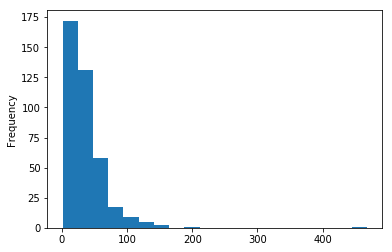

In [136]:
alex_df.Words.plot.hist(by=None, bins=20)

In [137]:
alex_df.Words.describe()

count    396.000000
mean      35.575758
std       35.013586
min        1.000000
25%       16.000000
50%       28.000000
75%       45.250000
max      468.000000
Name: Words, dtype: float64

In [138]:
# Add text length in sentences
alex_df['Sentences'] = alex_df.apply(lambda row: len(row.Text.split('.')), axis=1)

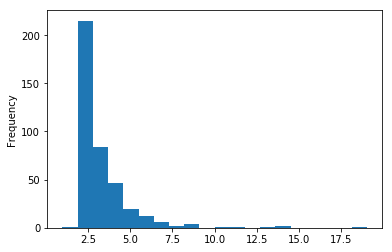

In [139]:
alex_df.Sentences.plot.hist(by=None, bins=20)

In [140]:
alex_df.Sentences.describe()

count    396.000000
mean       3.063131
std        1.915574
min        1.000000
25%        2.000000
50%        2.000000
75%        3.000000
max       19.000000
Name: Sentences, dtype: float64

## Text Processing

In [141]:
# Using nltk for text processing
import nltk
from nltk.tokenize import RegexpTokenizer 
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import SnowballStemmer
from nltk.tag.stanford import StanfordPOSTagger
from nltk.parse import CoreNLPParser

In [142]:
# CoreNLP API for NLTK does not seem to support lemmatization
# ! pip install stanfordcorenlp

In [143]:
from stanfordcorenlp import StanfordCoreNLP
import json

### Tokenization

In [144]:
# Reg Exp Tokenizer
tokenizer = RegexpTokenizer(r'\w+')

In [145]:
# Add column with list of tokens for each document
alex_df['Tokens'] = alex_df.apply(lambda row: tokenizer.tokenize(row.Text.lower()), axis=1) 

### Stop words

In [146]:
# Stop words in Spanish 
es_stop = set(stopwords.words('spanish'))

In [147]:
# Add column with list of stopped tokens for each document
alex_df['Tokens_Stop'] = alex_df.apply(lambda row: [i for i in row.Tokens if not i in es_stop], axis=1) 

### Stemming

In [148]:
# Porter stemmer
p_stemmer = PorterStemmer() 

In [149]:
# Add column with list of stemmed tokens for each document
alex_df['Tokens_Stem_P'] = alex_df.apply(lambda row: [p_stemmer.stem(i) for i in row.Tokens_Stop], axis=1) 

In [150]:
# Snowball stemmer
s_stemmer = SnowballStemmer('spanish')

In [151]:
# Add column with list of stemmed tokens for each document
alex_df['Tokens_Stem_S'] = alex_df.apply(lambda row: [s_stemmer.stem(i) for i in row.Tokens_Stop], axis=1) 

In [152]:
alex_df[['Tokens','Tokens_Stem_P', 'Tokens_Stem_S']]

,Tokens,Tokens_Stem_P,Tokens_Stem_S
0,"[es, un, niño, pensando, en, cual, es, la, res...","[niño, pensando, respuesta, deber, sabe]","[niñ, pens, respuest, deber, sab]"
1,"[soldados, descansando]","[soldado, descansando]","[sold, descans]"
2,"[una, cascada]",[cascada],[casc]
3,"[hombre, llorando, porque, su, mujer, ha, muerto]","[hombr, llorando, mujer, muerto]","[hombr, llor, muj, muert]"
4,"[un, niño, cansado, de, estudiar, y, presionad...","[niño, cansado, estudiar, presionado, padr, tr...","[niñ, cans, estudi, presion, padr, trist, inco..."
5,"[grupo, de, amigos, después, de, una, noche, d...","[grupo, amigo, despué, noch, diversión, cansad...","[grup, amig, despues, noch, diversion, cans, t..."
6,[acantilado],[acantilado],[acantil]
7,"[hombre, desolado, porque, se, ha, encontrado,...","[hombr, desolado, encontrado, mujer, fallecida]","[hombr, desol, encontr, muj, fallec]"
8,"[es, un, niño, que, está, aburrido, está, cans...","[niño, aburrido, cansado, tocar, violín]","[niñ, aburr, cans, toc, violin]"
9,"[esta, imagen, refleja, a, varios, hombres, en...","[imagen, refleja, vario, hombr, descanso, trab...","[imag, reflej, vari, hombr, descans, trabaj, e..."


### POS Tagging

In [153]:
# POS Tagging load (prep)
# Stanford POS tagger is a JAVA class invoked by nltk
import os
java_path = "C:\Program Files (x86)\Common Files\Oracle\Java\javapath"
os.environ['JAVAHOME'] = java_path

In [154]:
# POS Tagging load 

spanish_postagger = StanfordPOSTagger('models/spanish.tagger', 'stanford-postagger.jar')

In [155]:
spanish_postagger.tag('Esta es la frase más complicada del mundo.'.split())

[('Esta', 'PRON'),
 ('es', 'AUX'),
 ('la', 'DET'),
 ('frase', 'NOUN'),
 ('más', 'ADV'),
 ('complicada', 'ADJ'),
 ('del', 'ADP'),
 ('mundo.', 'PROPN')]

In [156]:
# Add column with POS Tagging
# alex_df['POS'] = alex_df.apply(lambda row: spanish_postagger.tag(row.Text.lower().split()), axis=1) 

In [157]:
# alex_df

In [158]:
# Perform pos tagging with the server
pos_tagger_srv = CoreNLPParser(url='http://localhost:9000', tagtype='pos')

In [159]:
# Add column with POS Tagging (server)
alex_df['POS'] = alex_df.apply(lambda row: pos_tagger_srv.tag(row.Text.lower().split()), axis=1) 

In [160]:
# alex_df

### Named Entity Recognition (NER)

In [161]:
from nltk.tag.stanford import StanfordNERTagger

In [162]:
# spanish_ner_tagger = StanfordNERTagger('models/spanish.ancora.distsim.s512.crf.ser.gz', 'stanford-ner.jar', encoding='utf8')

spanish_ner_tagger = StanfordNERTagger('models/spanish.kbp.ancora.distsim.s512.crf.ser.gz', 'stanford-ner.jar', encoding='utf8') 

In [163]:
spanish_ner_tagger.tag('Jorge Perez era amigo de Bill Gates, pero luego se fue a Croacia, que es parte de la Unión Europea'.split())

[('Jorge', 'PERSON'),
 ('Perez', 'PERSON'),
 ('era', 'O'),
 ('amigo', 'O'),
 ('de', 'O'),
 ('Bill', 'PERSON'),
 ('Gates,', 'PERSON'),
 ('pero', 'O'),
 ('luego', 'O'),
 ('se', 'O'),
 ('fue', 'O'),
 ('a', 'O'),
 ('Croacia,', 'O'),
 ('que', 'O'),
 ('es', 'O'),
 ('parte', 'O'),
 ('de', 'O'),
 ('la', 'O'),
 ('Unión', 'ORGANIZATION'),
 ('Europea', 'ORGANIZATION')]

In [164]:
# Add column with NER Tagging
# alex_df['NER'] = alex_df.apply(lambda row: spanish_ner_tagger.tag(row.Text.lower().split()), axis=1) 

In [165]:
"""
wc = 0
for i in alex_df.NER:
    for j in i:
        wc += 1
        if j[1] != 'O':
            print('Word: ' + j[0] + ", Entity: " + j[1])
print('%d words processed' % wc)
"""

'\nwc = 0\nfor i in alex_df.NER:\n    for j in i:\n        wc += 1\n        if j[1] != \'O\':\n            print(\'Word: \' + j[0] + ", Entity: " + j[1])\nprint(\'%d words processed\' % wc)\n'

In [166]:
# Same net tagging, now via server (just checking performance)
ner_tagger_srv = CoreNLPParser(url='http://localhost:9000', tagtype='ner') 

In [167]:
list(ner_tagger_srv.tag('Jorge Perez era amigo de Bill Gates, pero luego se fue a Croacia, que es parte de la Unión Europea'.split()))

[('Jorge', 'PERSON'),
 ('Perez', 'PERSON'),
 ('era', 'O'),
 ('amigo', 'O'),
 ('de', 'O'),
 ('Bill', 'PERSON'),
 ('Gates', 'PERSON'),
 (',', 'O'),
 ('pero', 'O'),
 ('luego', 'O'),
 ('se', 'O'),
 ('fue', 'O'),
 ('a', 'O'),
 ('Croacia', 'COUNTRY'),
 (',', 'O'),
 ('que', 'O'),
 ('es', 'O'),
 ('parte', 'O'),
 ('de', 'O'),
 ('la', 'O'),
 ('Unión', 'ORGANIZATION'),
 ('Europea', 'ORGANIZATION')]

In [168]:
# Add column with NER Tagging (from server)
alex_df['NER'] = alex_df.apply(lambda row: ner_tagger_srv.tag(row.Text.lower().split()), axis=1) 

In [169]:
wc = 0
for i in alex_df.NER:
    for j in i:
        wc += 1
        if j[1] != 'O':
            print('Word: ' + j[0] + ", Entity: " + j[1])
print('%d words processed' % wc)

Word: 10, Entity: NUMBER
Word: profesor, Entity: TITLE
Word: profesor, Entity: TITLE
Word: mañana, Entity: DATE
Word: dos, Entity: NUMBER
Word: mañana, Entity: DATE
Word: 15, Entity: NUMBER
Word: mañana, Entity: DATE
Word: cáncer, Entity: CAUSE_OF_DEATH
Word: río, Entity: TITLE
Word: mañana, Entity: DATE
Word: dos, Entity: NUMBER
Word: batería, Entity: TITLE
Word: río, Entity: TITLE
Word: mañana, Entity: DATE
Word: cuatro, Entity: NUMBER
Word: profesor, Entity: TITLE
Word: profesor, Entity: TITLE
Word: cuatro, Entity: NUMBER
Word: dos, Entity: NUMBER
Word: tren, Entity: CRIMINAL_CHARGE
Word: dos, Entity: NUMBER
Word: dibujante, Entity: TITLE
Word: mañana, Entity: DATE
Word: asesino, Entity: CRIMINAL_CHARGE
Word: en, Entity: CRIMINAL_CHARGE
Word: serie, Entity: CRIMINAL_CHARGE
Word: 4, Entity: NUMBER
Word: domingo, Entity: DATE
Word: río, Entity: TITLE
Word: río, Entity: TITLE
Word: río, Entity: TITLE
Word: tortura, Entity: CRIMINAL_CHARGE
Word: soldado, Entity: TITLE
Word: dos, Entity:

### Lexical Parsing

In [170]:
# Running the Stanford CoreNLP server in localhost:
# With Spanish models
# java -mx6g -cp "*" edu.stanford.nlp.pipeline.StanfordCoreNLPServer 
#    -serverProperties StanfordCoreNLP-spanish.properties 
#    -port 9000 
#    -timeout 15000

# https://github.com/nltk/nltk/wiki/Stanford-CoreNLP-API-in-NLTK 

In [171]:
from nltk.parse import CoreNLPParser

In [172]:
# Lexical Parser
spanish_parser = CoreNLPParser(url='http://localhost:9000')

In [173]:
list(spanish_parser.raw_parse('Esta es la frase más complicada del mundo.'))

[Tree('ROOT', [Tree('sentence', [Tree('sn', [Tree('grup.nom', [Tree('PRON', ['Esta'])])]), Tree('grup.verb', [Tree('AUX', ['es'])]), Tree('sn', [Tree('spec', [Tree('DET', ['la'])]), Tree('grup.nom', [Tree('NOUN', ['frase']), Tree('s.a', [Tree('s.a', [Tree('spec', [Tree('ADV', ['más'])]), Tree('grup.a', [Tree('ADJ', ['complicada'])])]), Tree('sp', [Tree('prep', [Tree('ADP', ['del'])]), Tree('sn', [Tree('grup.nom', [Tree('NOUN', ['mundo'])])])])])])]), Tree('PUNCT', ['.'])])])]

In [174]:
# In principle, we don't need the lexical tree as part of the dataset

### Dependency Parsing

In [175]:
# Neural Dependency Parser
from nltk.parse.corenlp import CoreNLPDependencyParser

dep_parser = CoreNLPDependencyParser(url='http://localhost:9000')

In [176]:
parses = dep_parser.parse('Esta es la frase más complicada del mundo.'.split())
[[(governor, dep, dependent) for governor, dep, dependent in parse.triples()] for parse in parses]

[[(('frase', 'NOUN'), 'nsubj', ('Esta', 'PRON')),
  (('frase', 'NOUN'), 'cop', ('es', 'AUX')),
  (('frase', 'NOUN'), 'det', ('la', 'DET')),
  (('frase', 'NOUN'), 'amod', ('complicada', 'ADJ')),
  (('complicada', 'ADJ'), 'advmod', ('más', 'ADV')),
  (('frase', 'NOUN'), 'nmod', ('mundo', 'NOUN')),
  (('mundo', 'NOUN'), 'case', ('del', 'ADP')),
  (('frase', 'NOUN'), 'punct', ('.', 'PUNCT'))]]

In [177]:
def getDepList(tokens):
    parses = dep_parser.parse(tokens)
    return [[(governor, dep, dependent) for governor, dep, dependent in parse.triples()] for parse in parses]

In [178]:
# Add column with Dependency Parsing
alex_df['DEP'] = alex_df.apply(lambda row: getDepList(row.Text.lower().split()), axis=1) 

In [179]:
alex_df.head()

,Code,TAS20,F1,F2,F3,Gender,Age,Card,T_Metaphors,T_ToM,...,Alex_B,Words,Sentences,Tokens,Tokens_Stop,Tokens_Stem_P,Tokens_Stem_S,POS,NER,DEP
0,bc39e22ca5dba59fbd97c27987878f56,40,16,9,15,2,22,1,0,1,...,0,16,2,"[es, un, niño, pensando, en, cual, es, la, res...","[niño, pensando, respuesta, deberes, sabe]","[niño, pensando, respuesta, deber, sabe]","[niñ, pens, respuest, deber, sab]","[(es, AUX), (un, DET), (niño, NOUN), (pensando...","[(es, O), (un, O), (niño, O), (pensando, O), (...","[[(('niño', 'NOUN'), cop, ('es', 'AUX')), (('n..."
1,bc39e22ca5dba59fbd97c27987878f56,40,16,9,15,2,22,9VH,0,0,...,0,2,2,"[soldados, descansando]","[soldados, descansando]","[soldado, descansando]","[sold, descans]","[(soldados, NOUN), (descansando, VERB), (., PU...","[(soldados, O), (descansando, O), (., O)]","[[(('descansando', 'VERB'), nsubj, ('soldados'..."
2,bc39e22ca5dba59fbd97c27987878f56,40,16,9,15,2,22,11,0,0,...,0,2,2,"[una, cascada]",[cascada],[cascada],[casc],"[(una, DET), (cascada, NOUN), (., PUNCT)]","[(una, O), (cascada, O), (., O)]","[[(('cascada', 'NOUN'), det, ('una', 'DET')), ..."
3,bc39e22ca5dba59fbd97c27987878f56,40,16,9,15,2,22,13HM,0,1,...,0,7,2,"[hombre, llorando, porque, su, mujer, ha, muerto]","[hombre, llorando, mujer, muerto]","[hombr, llorando, mujer, muerto]","[hombr, llor, muj, muert]","[(hombre, NOUN), (llorando, VERB), (porque, SC...","[(hombre, O), (llorando, O), (porque, O), (su,...","[[(('llorando', 'VERB'), nsubj, ('hombre', 'NO..."
4,20cd825cadb95a71763bad06e142c148,40,12,10,18,2,22,1,0,1,...,0,29,4,"[un, niño, cansado, de, estudiar, y, presionad...","[niño, cansado, estudiar, presionado, padres, ...","[niño, cansado, estudiar, presionado, padr, tr...","[niñ, cans, estudi, presion, padr, trist, inco...","[(un, DET), (niño, NOUN), (cansado, ADJ), (de,...","[(un, O), (niño, O), (cansado, O), (de, O), (e...","[[(('niño', 'NOUN'), det, ('un', 'DET')), (('n..."


### Lemmatization (spanish)

CoreNLP Spanish Lemmatizer seems not to work properly, it keeps returning the very same word.

In [180]:
nlp = StanfordCoreNLP('http://localhost', port=9000, timeout=30000)

In [181]:
props = {'annotators': 'pos,lemma',
         'pipelineLanguage': 'es',
         'outputFormat': 'json'}

In [182]:
sentence = "Era una casita que antes esta casota, pero casilla es como casa"
parsed_str = nlp.annotate(sentence, properties=props)
parsed_dict = json.loads(parsed_str)
parsed_dict

{'sentences': [{'index': 0,
   'tokens': [{'index': 1,
     'word': 'Era',
     'originalText': 'Era',
     'lemma': 'era',
     'characterOffsetBegin': 0,
     'characterOffsetEnd': 3,
     'pos': 'AUX',
     'before': '',
     'after': ' '},
    {'index': 2,
     'word': 'una',
     'originalText': 'una',
     'lemma': 'una',
     'characterOffsetBegin': 4,
     'characterOffsetEnd': 7,
     'pos': 'DET',
     'before': ' ',
     'after': ' '},
    {'index': 3,
     'word': 'casita',
     'originalText': 'casita',
     'lemma': 'casita',
     'characterOffsetBegin': 8,
     'characterOffsetEnd': 14,
     'pos': 'NOUN',
     'before': ' ',
     'after': ' '},
    {'index': 4,
     'word': 'que',
     'originalText': 'que',
     'lemma': 'que',
     'characterOffsetBegin': 15,
     'characterOffsetEnd': 18,
     'pos': 'PRON',
     'before': ' ',
     'after': ' '},
    {'index': 5,
     'word': 'antes',
     'originalText': 'antes',
     'lemma': 'antes',
     'characterOffsetBegin': 

In [183]:
lemma_list = [v for d in parsed_dict['sentences'][0]['tokens'] for k,v in d.items() if k == 'lemma']
" ".join(lemma_list)

'era una casita que antes esta casota , pero casilla es como casa'

In [184]:
def getLemmaList_CoreNLP(text):
    parsed_str = nlp.annotate(text, properties=props)
    parsed_dict = json.loads(parsed_str)
    lemma_list = [v for d in parsed_dict['sentences'][0]['tokens'] for k,v in d.items() if k == 'lemma']
    return " ".join(lemma_list)

In [185]:
getLemmaList_CoreNLP("Hola, que mal funcionaba")

'hola , que mal funcionaba'

In [186]:
# Add column with Lemmas
alex_df['Lemmas_CNLP'] = alex_df.apply(lambda row: getLemmaList_CoreNLP(row.Text.lower()), axis=1) 

### Lemmatization (Spanish)
Using Spacy Rule-Based Spanish Lemmatizer 

In [187]:
# Trying to get better results with Spacy and rule-based lemmatizer from:
# https://github.com/pablodms/spacy-spanish-lemmatizer 

import spacy

In [188]:
# ! pip install spacy_spanish_lemmatizer

In [189]:
from spacy_spanish_lemmatizer import SpacyCustomLemmatizer

In [190]:
# ! python -m spacy download es

In [191]:
# https://stackoverflow.com/questions/49964028/spacy-oserror-cant-find-model-en 
nlp_spacy = spacy.load('es')

C:\Users\array\Anaconda3\lib\site-packages\spacy\util.py:275: UserWarning: [W031] Model 'es_core_news_sm' (2.2.0) requires spaCy v2.2 and is incompatible with the current spaCy version (2.3.2). This may lead to unexpected results or runtime errors. To resolve this, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


In [192]:
lemmatizer_spacy = SpacyCustomLemmatizer()
nlp_spacy.add_pipe(lemmatizer_spacy, name="lemmatizer", after="tagger")

In [193]:
# Funciona igual de mal que el de Stanford... 
for token in nlp_spacy("Era una casita que antes esta casota, pero casilla es como casa"): 
    print(token.text, token.lemma_)

Era era
una un
casita casita
que que
antes antes
esta este
casota casota
, ,
pero pero
casilla casilla
es es
como como
casa casa


In [194]:
text1 = "Ha habido casos en los que funcionó, dicen."
[token.lemma_ for token in nlp_spacy(text1)]

['ha', 'habido', 'caso', 'en', 'el', 'que', 'funcionar', ',', 'decir', '.']

In [195]:
def getLemmaList_Spacy(text):
    return [token.lemma_ for token in nlp_spacy(text)]

In [196]:
# Add column with Lemmas
alex_df['Lemmas_Spacy'] = alex_df.apply(lambda row: getLemmaList_Spacy(row.Text.lower()), axis=1)

In [197]:
alex_df[['Lemmas_CNLP','Lemmas_Spacy']].head()

,Lemmas_CNLP,Lemmas_Spacy
0,es un niño pensando en cual es la respuesta de...,"[es, un, niño, pensar, en, cual, es, el, respu..."
1,soldados descansando .,"[soldado, descansar, .]"
2,una cascada .,"[un, cascada, .]"
3,hombre llorando porque su mujer ha muerto .,"[hombre, llorando, porque, su, mujer, ha, muer..."
4,un niño cansado de estudiar y presionado por s...,"[un, niño, cansado, de, estudiar, y, presionad..."


### Dependency graph visualization

In [198]:
# ! pip install Graphviz
# ! pip install pydot
os.environ["PATH"] += ';C:\\Program Files (x86)\\Graphviz 2.44.1\\bin'

from graphviz import Digraph
from IPython.display import Image
# import pydot
import pydotplus

In [199]:
# dot = Digraph()
# dot.node('1')
# dot.node('2')
# dot.edges(['12'])
# dot

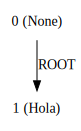

In [200]:
parse = next(dep_parser.raw_parse("Hola"))
parse

In [201]:
dep = next(dep_parser.raw_parse("Esta es una frase muy poco complicada."))
list(dep.triples())

[(('frase', 'NOUN'), 'nsubj', ('Esta', 'PRON')),
 (('frase', 'NOUN'), 'cop', ('es', 'AUX')),
 (('frase', 'NOUN'), 'det', ('una', 'DET')),
 (('frase', 'NOUN'), 'amod', ('complicada', 'ADJ')),
 (('complicada', 'ADJ'), 'advmod', ('poco', 'ADV')),
 (('poco', 'ADV'), 'advmod', ('muy', 'ADV')),
 (('frase', 'NOUN'), 'punct', ('.', 'PUNCT'))]

In [202]:
dep.tree().draw()

In [203]:
dep.to_dot()

'digraph G{\nedge [dir=forward]\nnode [shape=plaintext]\n\n0 [label="0 (None)"]\n0 -> 4 [label="ROOT"]\n1 [label="1 (Esta)"]\n2 [label="2 (es)"]\n3 [label="3 (una)"]\n4 [label="4 (frase)"]\n4 -> 1 [label="nsubj"]\n4 -> 2 [label="cop"]\n4 -> 3 [label="det"]\n4 -> 7 [label="amod"]\n4 -> 8 [label="punct"]\n5 [label="5 (muy)"]\n6 [label="6 (poco)"]\n6 -> 5 [label="advmod"]\n7 [label="7 (complicada)"]\n7 -> 6 [label="advmod"]\n8 [label="8 (.)"]\n}'

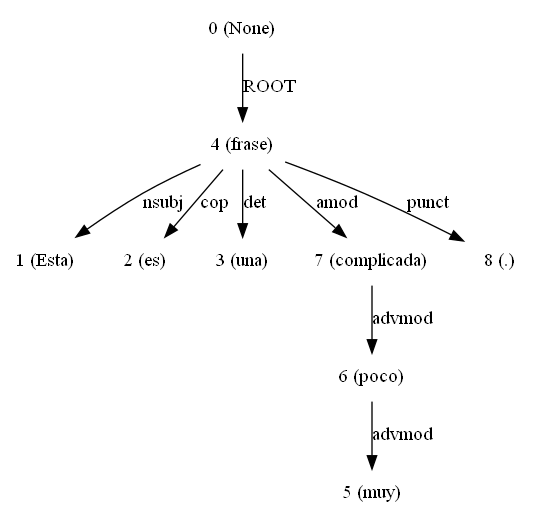

In [204]:
graph = pydotplus.graph_from_dot_data(dep.to_dot())
Image(graph.create_png())

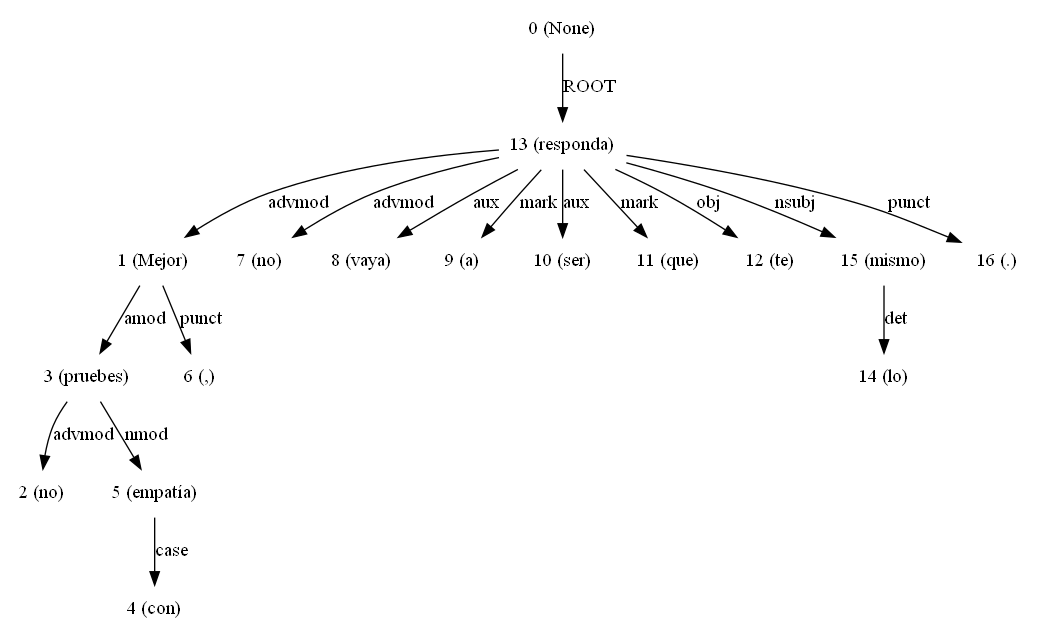

In [205]:
dep = next(dep_parser.raw_parse("Mejor no pruebes con empatía, no vaya a ser que te responda lo mismo."))
graph = pydotplus.graph_from_dot_data(dep.to_dot())
Image(graph.create_png())

### Exlusion criteria (word count)

In [206]:
# Exclusion criteria: get rid of too short and too long narratives. 

wc_lowerLimit = 5
wc_upperLimit = alex_df.Words.mean() + 4 * alex_df.Words.std() # around 175

selected_df = alex_df[(alex_df.Words > wc_lowerLimit) & (alex_df.Words < wc_upperLimit)]

In [207]:
print('%d rows deleted. %d remaining.' % (alex_df.Code.count() - selected_df.Code.count(), selected_df.Code.count()))

15 rows deleted. 381 remaining.


### Save processed dataset

In [208]:
# Dataset with classification, tags, text features, etc. 

alex_class_dataset_path = "D:\\Dropbox-Array2001\\Dropbox\\DataSets\\Prolexitim-Dataset\\Prolexitim_v2_processed_dep.csv"
selected_df.to_csv(alex_class_dataset_path, sep=';', encoding='utf-8', index=False)